In [2]:
import numpy as np 
#import pandas as pd 
import matplotlib.pyplot as plt 
from numpy import genfromtxt 

In [3]:
iris = np.genfromtxt('iris_Petal_Logistic.csv', delimiter = ',')
print(iris[:5])

[[1.4 0.2 0. ]
 [1.4 0.2 0. ]
 [1.3 0.2 0. ]
 [1.5 0.2 0. ]
 [1.4 0.2 0. ]]


In [4]:
X = iris[:,:2]
X[:5,:]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [5]:
y = iris[:,2]
y[:5]

array([0., 0., 0., 0., 0.])

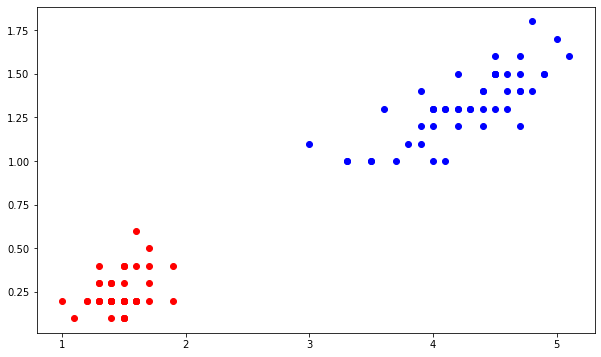

In [6]:
fig = plt.figure(figsize = (10,6))
plt.scatter(X[y == 0][:,0],X[y == 0][:,1],color = 'red', label = "0")
plt.scatter(X[y == 1][:,0],X[y == 1][:,1],color = 'blue',label = "1")
plt.show()

In [8]:
min = np.min(X)
max = np.max(X)
X = (X - min)/(max - min)
X

array([[0.26, 0.02],
       [0.26, 0.02],
       [0.24, 0.02],
       [0.28, 0.02],
       [0.26, 0.02],
       [0.32, 0.06],
       [0.26, 0.04],
       [0.28, 0.02],
       [0.26, 0.02],
       [0.28, 0.  ],
       [0.28, 0.02],
       [0.3 , 0.02],
       [0.26, 0.  ],
       [0.2 , 0.  ],
       [0.22, 0.02],
       [0.28, 0.06],
       [0.24, 0.06],
       [0.26, 0.04],
       [0.32, 0.04],
       [0.28, 0.04],
       [0.32, 0.02],
       [0.28, 0.06],
       [0.18, 0.02],
       [0.32, 0.08],
       [0.36, 0.02],
       [0.3 , 0.02],
       [0.3 , 0.06],
       [0.28, 0.02],
       [0.26, 0.02],
       [0.3 , 0.02],
       [0.3 , 0.02],
       [0.28, 0.06],
       [0.28, 0.  ],
       [0.26, 0.02],
       [0.28, 0.  ],
       [0.22, 0.02],
       [0.24, 0.02],
       [0.28, 0.  ],
       [0.24, 0.02],
       [0.28, 0.02],
       [0.24, 0.04],
       [0.24, 0.04],
       [0.24, 0.02],
       [0.3 , 0.1 ],
       [0.36, 0.06],
       [0.26, 0.04],
       [0.3 , 0.02],
       [0.26,

In [9]:
intercept = np.ones([X.shape[0],1])
X = np.concatenate((intercept, X),axis = 1)
inds = np.arange(X.shape[0])
np.random.shuffle(inds)
data_size = X.shape[0]

In [40]:
X_shuffle = X[inds]
X_shuffle.dtype

dtype('float64')

In [39]:
y_shuffle = y[inds]
y_shuffle.dtype

dtype('float64')

In [55]:

def tanh_function(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

def loss_function(h, y):
    h_scale = (h/2) + 0.5
    #print(h_scale)
    loss =  (y.T.dot(np.log(h_scale))) + ((1 - y).T.dot(np.log(1 - h_scale)))
    #print(loss)
    return -loss/len(y)
             
def predict(X, theta):    
    y_hat = tanh_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y_hat, y):
    #return np.dot(X.T, (y_hat-y)*(1+y_hat)/y_hat) / y.size
    g = X.T.dot(y_hat - y)
    return g/len(y)


In [67]:
# parameters and hyperparameters 
#epoch_max = 1000 # epoch_max loop iterate
n = 0.1 # learning_rate là gì.
epoch_max = 700
losses = []
accs= []
m = 45
theta = np.array([0.1,0.5,-0.1])
for epoch in range(epoch_max) : 
    for i in range(0, len(y_shuffle), m):
        X_train = X_shuffle[i:i+m,:]
        y_train = y_shuffle[i:i+m]
        
        out_put = predict(X_train, theta)
        #print(out_put)
        #print(y_train)
        # tính loss
        t = loss_function(out_put, y_train)
        losses.append(t)
        
        # đạo hàm 
        theta_gra = compute_gradient(X_train, out_put, y_train)
        
        theta = theta - n*theta_gra
        
       
       
losses    
        

[0.6468385301877487,
 0.6575866959151688,
 0.508989257662568,
 0.6662215198083796,
 0.6781128807971061,
 0.5006787057212035,
 0.6820773668345917,
 0.6939933486312969,
 0.49619100582859915,
 0.6937785471317197,
 0.7053455407787158,
 0.4931047805667431,
 0.7017963762568766,
 0.7129036475225949,
 0.4904327701706614,
 0.7068172095005484,
 0.7174495191788247,
 0.487778095817902,
 0.7094848408505369,
 0.7196607028261918,
 0.4849964856808658,
 0.710337605317191,
 0.7200856415910356,
 0.48205280553569335,
 0.7098060920218819,
 0.7191559612643894,
 0.4789575356357193,
 0.7082279247262676,
 0.717207053600381,
 0.47573803613058513,
 0.7058652997940215,
 0.7144979610272834,
 0.4724255977817897,
 0.7029208387937668,
 0.7112281581730343,
 0.4690498515873796,
 0.6995507013682761,
 0.7075509985884033,
 0.46563664461607424,
 0.695875031917678,
 0.7035842457188447,
 0.4622075296905351,
 0.6919861371559559,
 0.6994182341802067,
 0.4587799718461124,
 0.6879548332260561,
 0.6951221649616443,
 0.45536783565

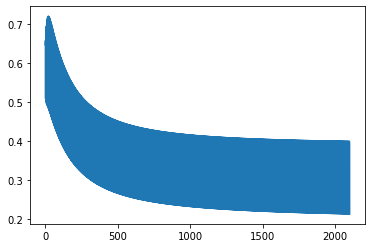

In [68]:
plt.plot(losses)
plt.show()

In [78]:
y_hta = predict(X_shuffle, theta)
a=y_hta.round()

array([-0.,  1.,  1., -0.,  1.,  1.,  0.,  1.,  1., -0.,  1.,  1.,  1.,
        1., -0., -0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1., -0., -0.,  1.,  1.,
        1.,  0.,  0.,  0., -0.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -0.,
       -0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
       -0.,  0.,  0., -0.,  0.,  1.,  0.,  1., -0.,  1.,  1.,  0., -0.,
       -0.,  1.,  1.,  1.,  0., -0., -0.,  1.,  0.,  1., -0., -0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  0., -0.])

In [81]:
t=sum(y_shuffle == a).mean()

100.0